In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [3]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]
df["answered_correctly"] = df["answered_correctly"].replace(-1, np.nan)

In [4]:
df[df["content_type_id"] == 1]["content_id"].value_counts().head(100)

3153     3759
21411    2743
10540    2469
29695    2409
15888    2318
27845    2144
32312    2108
29544    2104
26335    2086
18545    1935
14325    1916
8317     1847
9896     1835
21887    1824
5694     1731
5752     1726
14443    1693
8330     1641
335      1632
25843    1568
28621    1515
10852    1498
8708     1439
24985    1438
6808     1408
7949     1398
29579    1372
22089    1353
22034    1343
24697    1336
9758     1320
4425     1310
24908    1284
17326    1263
4057     1259
15430    1254
27339    1222
12472    1220
7926     1169
18186    1161
12638    1159
13605    1158
25401    1157
7477     1150
8976     1149
26516    1148
23336    1139
19744    1139
27115    1135
484      1127
22362    1123
17124    1121
16034    1120
1105     1119
28921    1116
89       1109
1501     1102
6797     1097
27022    1096
12811    1093
13660    1085
18239    1082
8207     1082
31589    1077
1731     1075
14942    1064
3123     1022
30207    1018
16874    1007
32168    1005
31613     999
3255  

In [5]:
df = df[df["task_container_id"] > 200]

In [6]:
def vis_lec(lec):
    df["leced"] = (df["content_id"] == lec).astype(int) * df["content_type_id"]
    df["leced"] = df.groupby("user_id")["leced"].cumsum()
    return df.groupby(["leced", "prior_question_had_explanation"])["answered_correctly"].describe()

In [14]:
vis_lec(10540)

count      mean       std  min  25%  \
leced prior_question_had_explanation                                            
0     False                             99000.0  0.695101  0.460367  0.0  0.0   
      True                            5123547.0  0.679991  0.466480  0.0  0.0   
1     False                             23958.0  0.718674  0.449655  0.0  0.0   
      True                            1013326.0  0.688604  0.463065  0.0  0.0   

                                      50%  75%  max  
leced prior_question_had_explanation                 
0     False                           1.0  1.0  1.0  
      True                            1.0  1.0  1.0  
1     False                           1.0  1.0  1.0  
      True                            1.0  1.0  1.0

In [8]:
vis_lec(18862)

count      mean       std  min  25%  \
leced prior_question_had_explanation                                            
0     False                            109127.0  0.699946  0.458283  0.0  0.0   
      True                            5304890.0  0.683166  0.465242  0.0  0.0   
1     False                             13831.0  0.697708  0.459268  0.0  0.0   
      True                             831983.0  0.670235  0.470128  0.0  0.0   

                                      50%  75%  max  
leced prior_question_had_explanation                 
0     False                           1.0  1.0  1.0  
      True                            1.0  1.0  1.0  
1     False                           1.0  1.0  1.0  
      True                            1.0  1.0  1.0

In [9]:
df["lec_sum"] = df.groupby("user_id")["content_type_id"].cumsum()

In [10]:
df[df["timestamp"] > 10**8].groupby(["lec_sum", "prior_question_had_explanation"])["answered_correctly"].describe().head(30)

count      mean       std  min  \
lec_sum prior_question_had_explanation                                      
0       False                            20625.0  0.623855  0.484429  0.0   
        True                            724534.0  0.679293  0.466749  0.0   
1       False                             5232.0  0.720566  0.448764  0.0   
        True                            308536.0  0.681434  0.465921  0.0   
2       False                             3864.0  0.712992  0.452424  0.0   
        True                            250824.0  0.683663  0.465047  0.0   
3       False                             3470.0  0.722190  0.447984  0.0   
        True                            199767.0  0.684302  0.464794  0.0   
4       False                             3676.0  0.690968  0.462157  0.0   
        True                            202154.0  0.663771  0.472419  0.0   
5       False                             3141.0  0.713467  0.452213  0.0   
        True                            184384.0  0.689024  0.462894  0.0   
6       False                             2951.0  0.691969  0.461758  0.0   
        True                            161285.0  0.671569  0.469644  0.0   
7       False                             2464.0  0.702922  0.457064  0.0   
        True                            147743.0  0.676560  0.467791  0.0   
8       False                             2486.0  0.726870  0.445656  0.0   
        True                            139881.0  0.673544  0.468918  0.0   
9       False                             2115.0  0.722931  0.447656  0.0   
        True                            126576.0  0.686449  0.463938  0.0   
10      False                             1987.0  0.701560  0.457689  0.0   
        True                            120937.0  0.676807  0.467698  0.0   
11      False                             2130.0  0.728638  0.444767  0.0   
        True                            113240.0  0.682462  0.465521  0.0   
12      False                             1848.0  0.707251  0.455147  0.0   
        True                            113442.0  0.681115  0.466047  0.0   
13      False                             2037.0  0.726559  0.445835  0.0   
        True                            107015.0  0.678849  0.466921  0.0   
14      False                             2458.0  0.748169  0.434153  0.0   
        True                            109842.0  0.677245  0.467532  0.0   

                                        25%  50%  75%  max  
lec_sum prior_question_had_explanation                      
0       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
1       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
2       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
3       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
4       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
5       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
6       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
7       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
8       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
9       False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
10      False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0  1.0  
11      False                           0.0  1.0  1.0  1.0  
        True                            0.0  1.0  1.0

In [11]:
df_oof_lgbm = pd.read_csv("../output/ex_172/20201202080625/oof_train_0_lgbm.csv")
df_oof_lgbm.columns = ["index", "predict", "target"]
df = pd.merge(df.reset_index(), df_oof_lgbm, how="left")

In [15]:
df["leced"] = (df["content_id"] == 10540).astype(int) * df["content_type_id"]
df["leced"] = df.groupby("user_id")["leced"].cumsum()

In [16]:
df[df["predict"].notnull()].groupby(["leced", "prior_question_had_explanation"]).agg({"answered_correctly": ["count", "mean"], "predict":["mean"]})

answered_correctly             predict
                                                  count      mean      mean
leced prior_question_had_explanation                                       
0     False                                       19889  0.686158  0.689388
      True                                      1034731  0.670830  0.674439
1     False                                        5514  0.701850  0.708298
      True                                       231732  0.689594  0.693030

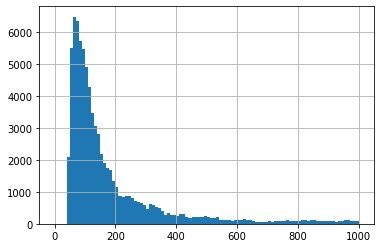

In [75]:
df[df["lec_sum"] == 1]["task_container_id"].hist(bins=100, range=(0, 1000))

In [76]:
df["task_container_bin50"] = df["task_container_id"] // 50

In [77]:
df[df["lec_sum"] == 1].groupby(["task_container_bin50"]).agg({"answered_correctly": ["count", "mean"], "predict":["mean"]}).head(30)

answered_correctly             predict
                                  count      mean      mean
task_container_bin50                                       
0                                  2073  0.639653  0.652454
1                                 29464  0.633112  0.642526
2                                 18506  0.662812  0.665149
3                                  8862  0.665877  0.669188
4                                  4638  0.666451  0.673977
5                                  3419  0.681193  0.682784
6                                  2682  0.688665  0.690669
7                                  1546  0.679819  0.676190
8                                  1252  0.643770  0.658322
9                                  1132  0.636042  0.664830
10                                  889  0.664792  0.692258
11                                  567  0.638448  0.648131
12                                  630  0.668254  0.650708
13                                  331  0.631420  0.625895
14                                  412  0.599515  0.628865
15                                  478  0.671548  0.672806
16                                  535  0.678505  0.698197
17                                  466  0.605150  0.641255
18                                  408  0.637255  0.653958
19                                  468  0.634615  0.644325
20                                  390  0.617949  0.665027
21                                  454  0.599119  0.622646
22                                  351  0.555556  0.577459
23                                  367  0.632153  0.658919
24                                  196  0.617347  0.666425
25                                  132  0.636364  0.641520
26                                   94  0.776596  0.726696
27                                  168  0.779762  0.799926
28                                  140  0.714286  0.757982
30                                   39  0.512821  0.531115